Firstly, we need to import the data from the csv file and get some information about the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum

df = pd.read_csv('autos.csv', encoding='Latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

The output indicated that there were 371528 rows of data, corresponding to 371528 vehicles sold. Some columns were not completely filled, for example, the 'vehicleType' column has only 333659 values. 

Next, we take a look at the first few rows of data.

In [2]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


As the data was taken from ebay-kleinanzeigen, there are numerous values in german. Those values need to be translated to english so that the data can be interpretable for most of people. The translation will focus on categorical columns, whose numbers of distinct values are limited. For example, the column 'seller' has only 2 distinct values which are 'privat' and 'gewerblich'. 

Let us have a look at the values of each column.

In [3]:
df.seller.unique()

array(['privat', 'gewerblich'], dtype=object)

In [4]:
df.offerType.unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [5]:
df.abtest.unique()

array(['test', 'control'], dtype=object)

In [6]:
df.vehicleType.unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [7]:
df.gearbox.unique()

array(['manuell', 'automatik', nan], dtype=object)

In [8]:
df.model.unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '

In [9]:
df.fuelType.unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [10]:
df.brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada'], dtype=object)

In [11]:
df.notRepairedDamage.unique()

array([nan, 'ja', 'nein'], dtype=object)

After that all the german values are found, they will be mapped to their corresponding english words. 

In [12]:
seller_map = {'privat': 'private', 'gewerblich': 'commercial'}
offer_type_map = {'Angebot': 'offer', 'Gesuch': 'request'}
vehicle_type_map = {'coupe': 'coupe', 'suv': 'suv', 'kleinwagen': 'supermini', 'limousine': 'limousine', 'cabrio': 'convertible',
'bus': 'bus', 'kombi': 'station wagon', 'andere': 'other'}
gearbox_map = {'manuell': 'manual', 'automatik': 'automatic'}
fuel_type_map = {'benzin': 'petrol', 'diesel': 'diesel', 'lpg': 'lpg', 'andere': 'other', 'hybrid': 'hybrid', 'cng': 'cng', 'elektro': 'electricity'}
repair_map = {'ja': True, 'nein': False}

df.seller = df.seller.map(seller_map, na_action='ignore')
df.offerType = df.offerType.map(offer_type_map, na_action='ignore')
df.vehicleType = df.vehicleType.map(vehicle_type_map, na_action='ignore')
df.gearbox = df.gearbox.map(gearbox_map, na_action='ignore')
df.fuelType = df.fuelType.map(fuel_type_map, na_action='ignore')
df.notRepairedDamage = df.notRepairedDamage.map(repair_map, na_action='ignore')
df.model = df.model.str.replace('_', ' ')
df.model = df.model.str.replace('klasse', 'class')
df.model = df.model.str.replace('andere', 'other')
df.brand = df.brand.str.replace('_', ' ')
df['horsePower'] = df.powerPS
df.drop('powerPS', axis=1, inplace=True)

In [13]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,horsePower
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,0
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,NaN,125000,5,diesel,audi,True,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,190
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,163
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,supermini,2001,manual,golf,150000,6,petrol,volkswagen,False,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,75
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,supermini,2008,manual,fabia,90000,7,diesel,skoda,False,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,69


The columns which are supposed to be categorical are still of string type, they need to be converted to the right format. The string columns containing datetime values also need to be converted to datetime columns so they can be used to slice, sort or resample the data. 

In [14]:
df.dateCrawled = pd.to_datetime(df.dateCrawled)
df.dateCreated = pd.to_datetime(df.dateCreated)
df.lastSeen = pd.to_datetime(df.lastSeen)
df.seller = df.seller.astype('category')
df.offerType = df.offerType.astype('category')
df.abtest = df.abtest.astype('category')
df.vehicleType = df.vehicleType.astype('category')
df.gearbox = df.gearbox.astype('category')
df.model = df.model.astype('category')
df.fuelType = df.fuelType.astype('category')
df.brand = df.brand.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null datetime64[ns]
name                   371528 non-null object
seller                 371528 non-null category
offerType              371528 non-null category
price                  371528 non-null int64
abtest                 371528 non-null category
vehicleType            333659 non-null category
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null category
model                  351044 non-null category
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null category
brand                  371528 non-null category
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null datetime64[ns]
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen               371528 non-n

After converting to some columns to categorical ones, we can see a drop in the size of data from 56.7 MB to 37.2MB because the categorical columns are more optimized to store categorical data.

Next, we will use the data to extract some meaningful information. We start with seeing top 20 brands whose cars were sold the most. To do this, we have to count the number of cars sold for each brand then the brands by their counts and get the first 20. We will see this information using a pie chart.

In [15]:
# Count the number of cars sold for each brand, get the top 20 brands
sale_by_brand = df.brand.value_counts().reset_index(name='total').rename(columns={'index':'brand'}).iloc[:20]
# For each of top 20 brands, calculate the angle of the zone occupied on the pie chart
sale_by_brand['angle'] = sale_by_brand.total/sale_by_brand.total.sum() * 2 * np.pi
sale_by_brand

,brand,total,angle
0,volkswagen,79640,1.448961
1,bmw,40274,0.732741
2,opel,40136,0.730230
3,mercedes benz,35309,0.642408
4,audi,32873,0.598088
5,ford,25573,0.465272
6,renault,17969,0.326926
7,peugeot,11027,0.200624
8,fiat,9676,0.176044
9,seat,7022,0.127757


In [16]:
sale_by_brand['color'] = Category20c[sale_by_brand.shape[0]]

output_notebook()
p = figure(plot_height=350, title="Top 20 models", toolbar_location=None, tools="hover", 
           tooltips="@brand: @total", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='brand', source=sale_by_brand)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

Loading BokehJS ...

As we can see, cars from Volkswagen were sold the most with 79640, which is approximately 2 times more than the figures of BMW and Opel. 

Now, we look further into numerical data to detect odd values that may appear

In [17]:
df.describe()

,price,yearOfRegistration,kilometer,monthOfRegistration,nrOfPictures,postalCode,horsePower
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.0,371528.00000,371528.000000
mean,1.729514e+04,2004.577997,125618.688228,5.734445,0.0,50820.66764,115.549477
std,3.587954e+06,92.866598,40112.337051,3.712412,0.0,25799.08247,192.139578
min,0.000000e+00,1000.000000,5000.000000,0.000000,0.0,1067.00000,0.000000
25%,1.150000e+03,1999.000000,125000.000000,3.000000,0.0,30459.00000,70.000000
50%,2.950000e+03,2003.000000,150000.000000,6.000000,0.0,49610.00000,105.000000
75%,7.200000e+03,2008.000000,150000.000000,9.000000,0.0,71546.00000,150.000000
max,2.147484e+09,9999.000000,150000.000000,12.000000,0.0,99998.00000,20000.000000


There are indeed some strange values. The maximum price for a car is more than 2 billions, whether in USD or EUR, this is an unusual price for a car. Some cars have 1000 and 9999 as year of registration, 0 as month of registration. The number of pictures is 0 for all cars. Some cars have 0 HPs. Those values need to be fixed or removed.

We drop the column 'nrOfPictures' as it does not serve any purpose. 

In [18]:
df.drop('nrOfPictures', axis=1, inplace=True)

We use boxplots to see how the car prices and horse powers are distributed.

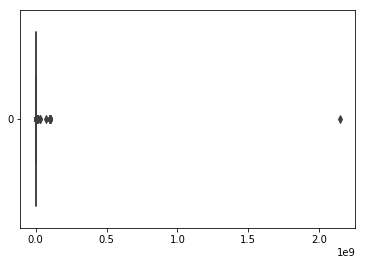

In [19]:
import seaborn as sns
sns.boxplot(data=df['price'], orient="h")

Some outliers make the boxplot invisible as their values are too extreme.

Let us take a look at one of those.

In [20]:
df[df.price == df.price.max()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,horsePower
129969,2016-03-11 08:37:57,Kaufe_AUTOS_Zum_basteln,private,offer,2147483647,test,other,1996,manual,NaN,150000,1,other,sonstige autos,True,2016-03-11,4720,2016-03-20 11:45:35,888


This row was likely filled with random values for the price and the horse power. Such row may skew the results of statistical analysises so it needs to be removed.

Now we show the boxplots without outliers.

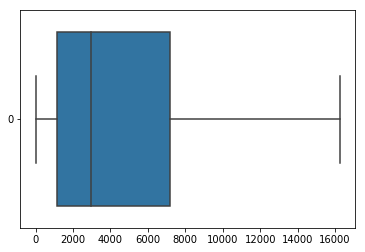

In [21]:
sns.boxplot(data=df['price'], orient="h", showfliers=False)

According to the boxplot, 50% of the cars sold are in the price range from around 1000 to 7000, and the price goes up to just above 16000 for about 99% of the cars. 

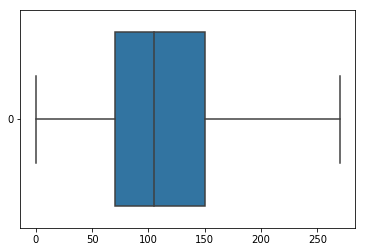

In [22]:
sns.boxplot(data=df['horsePower'], orient="h", showfliers=False)

Likewise, 50% of the cars are from arount 75 to 150 HPs. Around 99% of the cars are less than 275 HPs.

We remove rows where 'price', 'horsePower' or 'monthOfRegistration' are 0. Before doing that, we need to see how much data we may lose by removing those rows. 

In [23]:
df[(df.price == 0.0) | (df.horsePower == 0.0) | (df.monthOfRegistration == 0)].shape[0] / df.shape[0]

0.18304138584440474

Around 18% of rows will be lost, it is an acceptable amount considering that the data has more than 370 thousands rows.

In [24]:
df = df[(df.price > 0.0) & (df.horsePower > 0.0) & (df.monthOfRegistration > 0)]

Let us see if there is any difference in prices between the cars which have damages that were not repaired and the others.

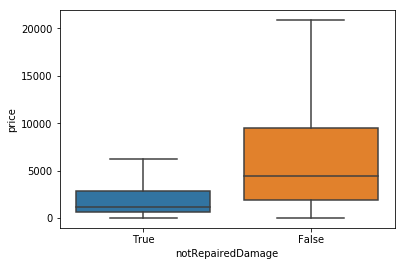

In [25]:
sns.boxplot(x='notRepairedDamage', y='price',data=df, showfliers=False)

As we can see, the cars with damages that were not repaired are in lower price range.

Let us compare the prices between cars with different gearboxes.

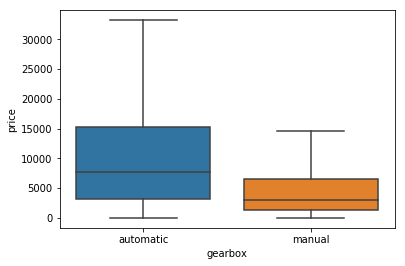

In [26]:
sns.boxplot(x='gearbox', y='price',data=df, showfliers=False)

As shown in the plot, cars with automatic transmission are more expensive in general.

Next, we see the number of cars sold by year of registration. But first, we need list all values for year of registration in the data to spot any errors.

In [27]:
years = np.sort(df.yearOfRegistration.unique())
years

array([1000, 1234, 1400, 1500, 1600, 1800, 1910, 1911, 1923, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2800, 2900, 3000, 4800, 5000, 6500, 8200, 9000],
      dtype=int64)

Year 1800 and below are unreasonable years of registration. Moreover, there can not be cars that were registered after 2019. Thus, we remove rows with invalid years of registration and plot the rest of the data.  

Text(0, 0.5, 'number of cars sold')

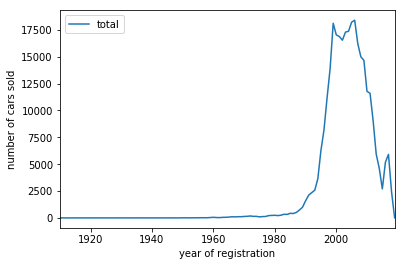

In [28]:
ci = [1910, 2019]
df = df[(df.yearOfRegistration >= ci[0]) & (df.yearOfRegistration <= ci[1])]
sale_by_year = df.yearOfRegistration.value_counts().reset_index().sort_values('index').rename(columns={'index': 'year', 'yearOfRegistration': 'total'})
sale_by_year.plot('year', 'total')
plt.xlabel('year of registration')
plt.ylabel('number of cars sold')

It can be seen than most of the cars sold were registered right before or after year 2000.

Next, we check how the number of cars sold varies by performance. We choose a confident interval of 98% for the column 'horsePower' to exclude outliers.

In [29]:
ci = [df.horsePower.quantile(0.01), df.horsePower.quantile(0.99)]
ci

[45.0, 349.0]

(array([68741., 61351., 60108., 48468., 28817., 13591.,  8354.,  4082.,
         2736.,  1910.]),
 array([ 45. ,  75.4, 105.8, 136.2, 166.6, 197. , 227.4, 257.8, 288.2,
        318.6, 349. ]),
 <a list of 10 Patch objects>)

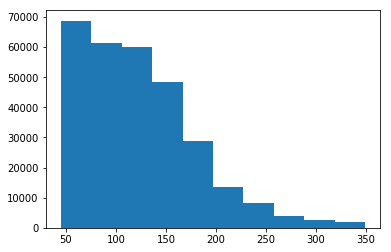

In [30]:
cars_with_avg_power = df[(df.horsePower >= ci[0]) & (df.horsePower <= ci[1])]
plt.hist(cars_with_avg_power.horsePower)

The histogram shows that people tend to buy cars with less HPs. Cars with horse power between 50 and 75 has the highest figure which is nearly 70000 units sold. Then, the number decreases slightly while increasing the performance. 

This may be because cars with higher performance are usually more expensive. We will plot the columns 'horsePower' and 'price' to see if there is any correlation between the the two. We also need to exclude cars with extreme prices because these affect the visuality of the plot, so we a confident interval of 98% for the column 'price'

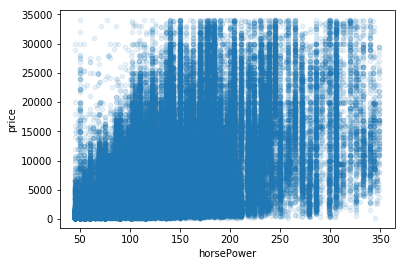

In [33]:
ci = [cars_with_avg_power.price.quantile(0.01), cars_with_avg_power.price.quantile(0.99)]
cars_with_avg_power_price = cars_with_avg_power[(cars_with_avg_power.price >= ci[0]) & (cars_with_avg_power.price <= ci[1])]
cars_with_avg_power_price.plot(kind='scatter', x='horsePower', y='price', alpha=0.1)

In [35]:
cars_with_avg_power_price[['price', 'horsePower', 'yearOfRegistration']].corr()

,price,horsePower,yearOfRegistration
price,1.000000,0.545542,0.453268
horsePower,0.545542,1.000000,0.139283
yearOfRegistration,0.453268,0.139283,1.000000
